# Pengolahan Citra Digital FFT

- Nama  = Muhammad Rizky Anugrah
- NIM   = 1306620089
- Kelas = Fisika - B
- Mata Kuliah = Pengolahan Citra Digital 

Tugas
1. Carilah suatu gambar (browsing)
2. Lakukan transformasi FFT
3. Plot FFT spectrum dan phase spectrum
4. Transormasi balik FFT
5. Buat threshold divariasikan, terus ditransformasi balik

## IMPORT DAN FUNGSI

In [177]:
%matplotlib inline
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from scipy import stats
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit
from scipy import fftpack

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

## Nomor 1

In [178]:
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks

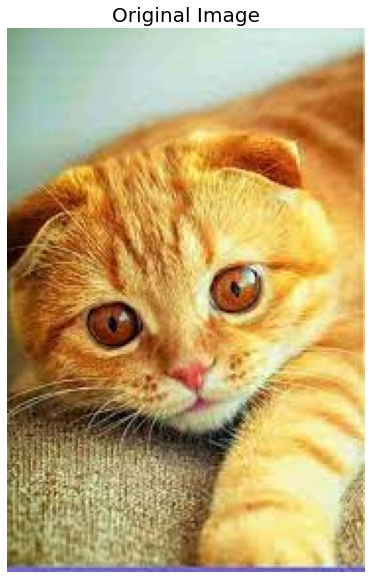

In [179]:
im = Image.open("KUCING EPOS.jpg")
pylab.figure(figsize=(15,10))
plot_image(im, 'Original Image')

## Nomor 2

In [180]:
import numpy.fft as fp
im1 = rgb2gray(imread('KUCING EPOS.jpg'))
freq1 = fp.fft2(im1)
im1_ = fp.ifft2(freq1).real
print('FFT\n', freq1)
print('')
print('Inverse FFT\n', im1_)

FFT
 [[32222.22108471+4.97379915e-14j  -513.21562794+2.76102454e+03j
   -915.24755024+1.12315349e+03j ...  -441.07996867-5.82674364e+02j
   -915.24755024-1.12315349e+03j  -513.21562794-2.76102454e+03j]
 [ 1593.69992779-5.68286543e+02j -1201.85231999-2.63256491e+02j
  -1112.91147698-1.02674969e+03j ...   422.06425329+6.39478369e+02j
    194.77344463-4.17146116e+01j  1460.96689003+2.09043969e+03j]
 [  900.43311299+1.72731296e+02j  -891.98130162+6.34391653e+02j
   -592.75210061-3.29931809e+02j ...  -123.09757233-5.30295018e+01j
    393.5854907 -6.49281853e+02j   221.28429648+1.92680425e+02j]
 ...
 [   40.91551096+3.88801508e+02j  -477.06176672+6.92998373e+02j
   -201.49905831+1.47506582e+02j ...   285.67492763-2.40041892e+02j
    186.96062283-1.10107050e+02j  -140.36027207-9.80979365e+02j]
 [  900.43311299-1.72731296e+02j   221.28429648-1.92680425e+02j
    393.5854907 +6.49281853e+02j ...  -508.59079782-1.77685967e+02j
   -592.75210061+3.29931809e+02j  -891.98130162-6.34391653e+02j]
 [ 15

## Nomor 3

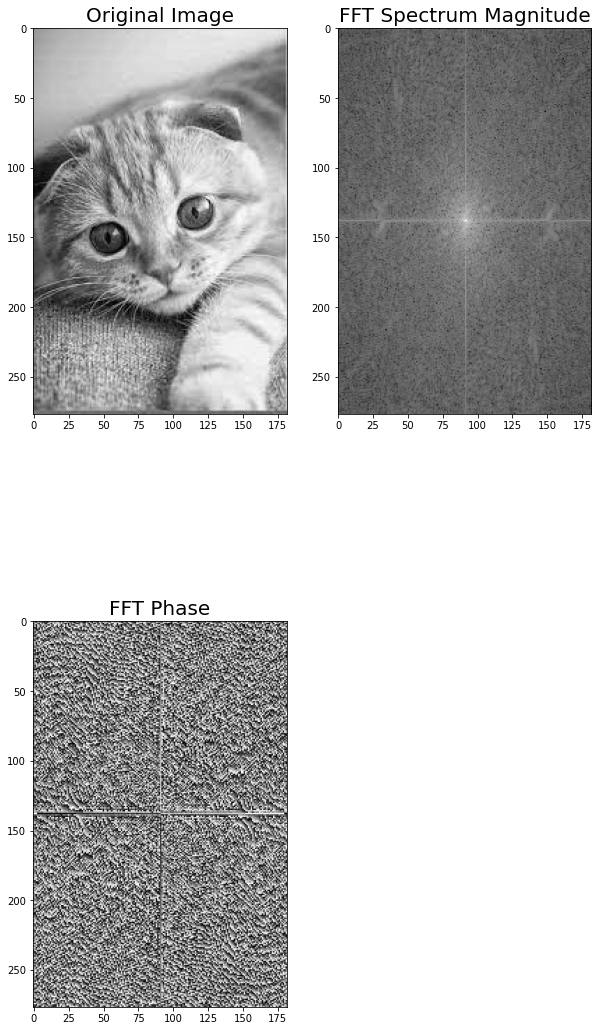

In [181]:
pylab.figure(figsize=(10,20))
pylab.subplot(2,2,1), pylab.imshow(im1, cmap='gray'), pylab.title('Original Image', size=20)
pylab.subplot(2,2,2), pylab.imshow(20*np.log10( 0.01 + np.abs(fp.fftshift(freq1))), cmap='gray')
pylab.title('FFT Spectrum Magnitude', size=20)
pylab.subplot(2,2,3), pylab.imshow(np.angle(fp.fftshift(freq1)),cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.show()

## Nomor 4

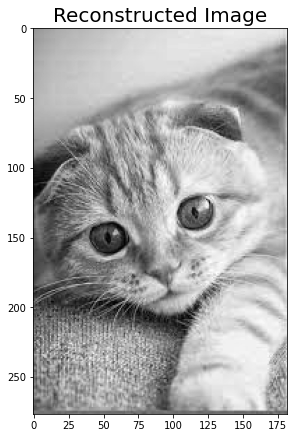

In [182]:
pylab.figure(figsize=(10,20))
pylab.subplot(2,2,4), pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

## Nomor 5

### THRESHOLDING WITH GAUSSIAN

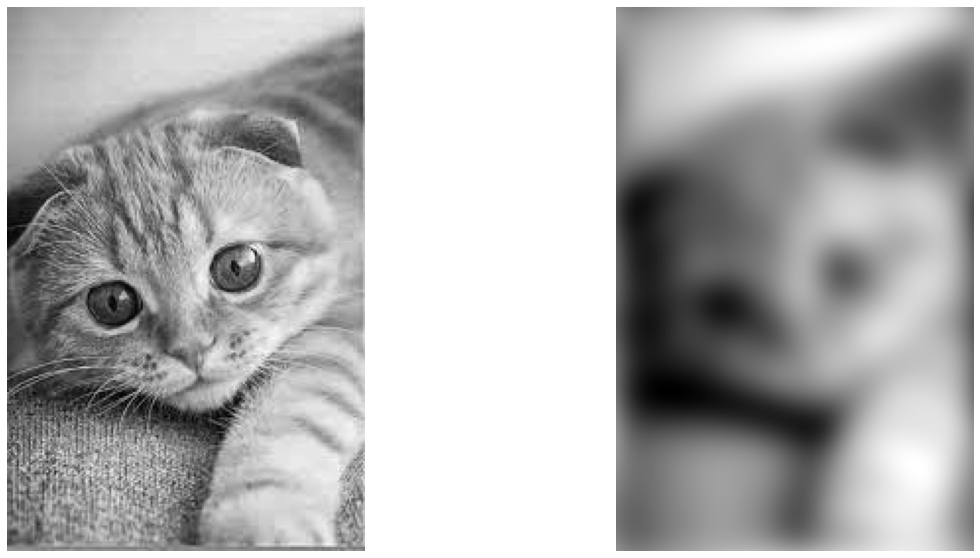

In [183]:
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20,10))
pylab.gray()
im = np.mean(imread('KUCING EPOS.jpg'), axis=2)
axes1.imshow(im)
axes1.axis('off')
freq = fp.fft2(im)
for i in range(1,10):
    freq_gaussian = ndimage.fourier_gaussian(freq, sigma=i)
    im1 = fp.ifft2(freq_gaussian)
    axes2.imshow(im1.real)
    axes2.axis('off')
pylab.show()

### THRESHOLDING MANUAL

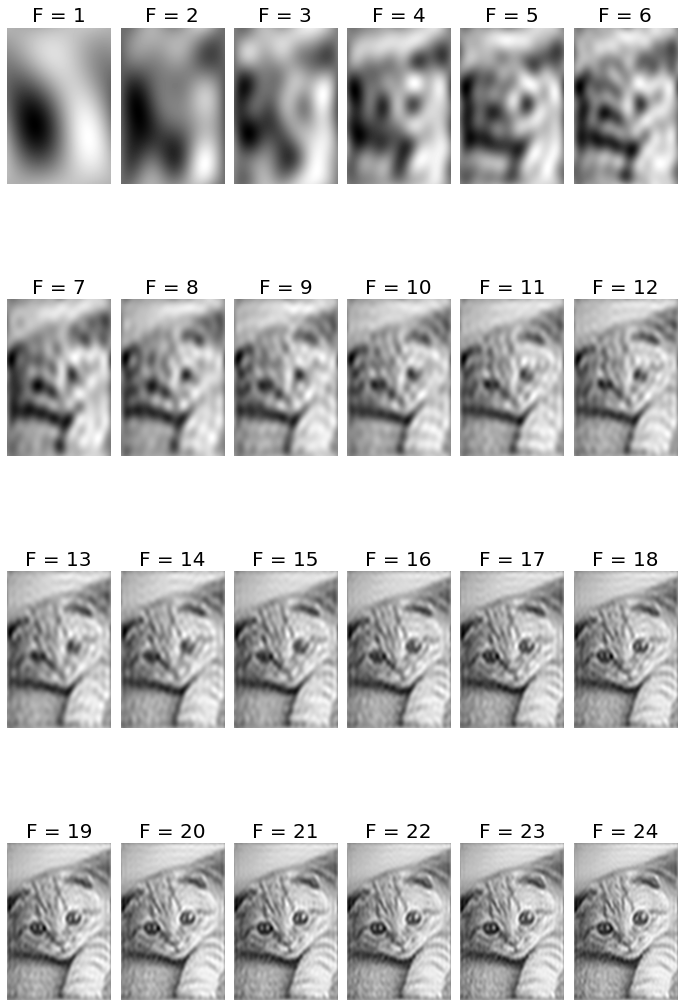

In [184]:
im = np.array(Image.open('KUCING EPOS.jpg').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_lp = []
ubs = list(range(1,25))
pylab.figure(figsize=(12,20))
for u in ubs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2_low = np.copy(freq2)
    freq2_low[half_w-u:half_w+u+1,half_h-u:half_h+u+1] = 0
    freq2 -= freq2_low
    im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
    snrs_lp.append(signaltonoise(im1, axis=None))
    pylab.subplot(4,6,u), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('F = ' + str(u), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

In [185]:
def syarat_threshold(freq1,threshold):
    array = freq1.copy()
    for y in range(len(array)):
        for x in range(len(array[y])):
            if array[y][x] < threshold:
                array[y][x] = 0
    return array

In [188]:
def plot_threshold(freq1,threshold):
    pylab.figure(figsize=(20,15))
    thresholding = 1
    for i in range(1,11):
        fft_threshold_copy = freq1.copy()
        fft_thresholding = syarat_threshold(fft_threshold_copy,threshold)
        ifft = fp.ifft2(fft_thresholding).real
        image_ifft = np.clip(ifft,0,255)
        pylab.subplot(2,5,i)
        pylab.imshow(image_ifft, cmap=pylab.cm.gray)
        pylab.title('Threshold = '+str(round(threshold)), size = 15)
        thresholding += 1
        threshold *= thresholding
    return

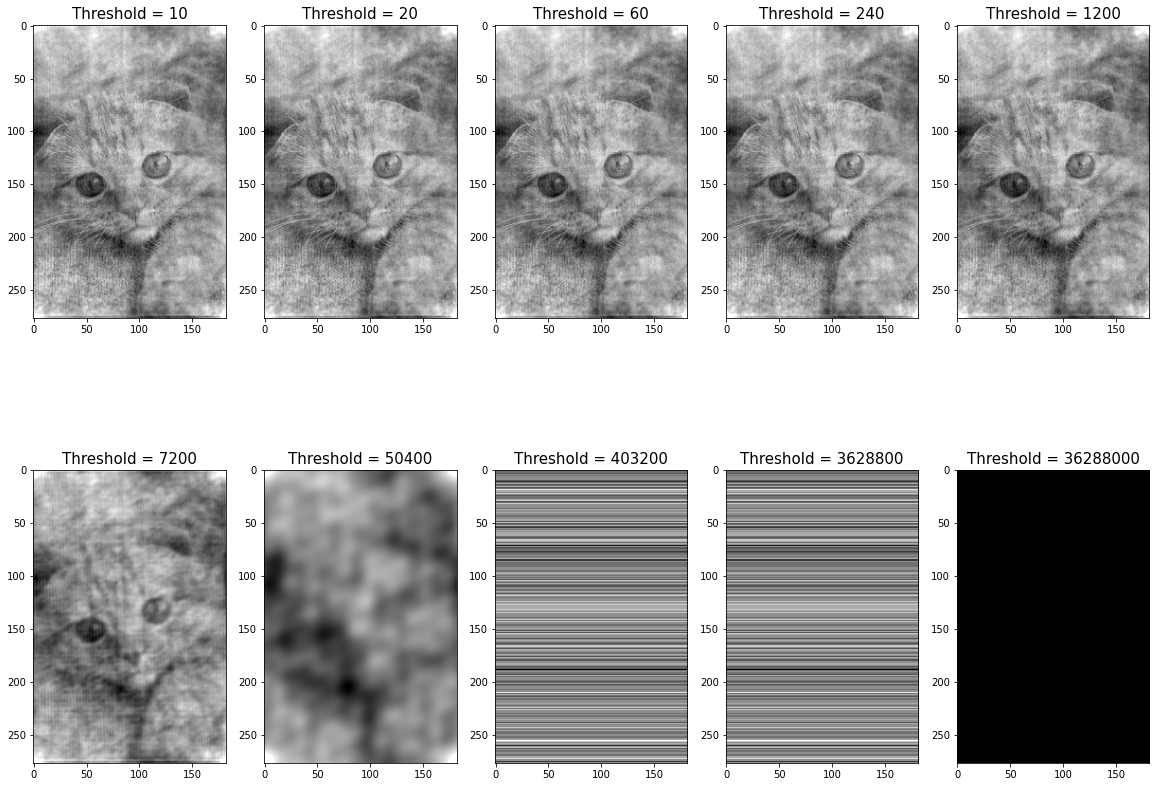

In [189]:
plot_threshold(freq1,10)